# Advanced ML Week 1, Lecture 1: Working with and Preparing Text Data

___

- 12/20/23
- This is a modified version of our in-class notebook from lecture 01 with Twitter Sentiment analysis.
- The dataset has been replaced with a subset of amazon product reviews.

___

### New Sections/Content
- See Prepare-Amazon-Reviews-Subset-csv.ipynb for selection of subset brand.
- [✨Removing HTML with Regex](#regex)
- Data Introduction (below):

### Amazon Data Intro

In [1]:
from IPython.display import display, Markdown
with open("data/Amazon Product Reviews.md") as f:
    info = f.read()

display(Markdown(info))

# Amazon Product Reviews

- URL: https://cseweb.ucsd.edu/~jmcauley/datasets.html#amazon_reviews 

## Description

This is a large crawl of product reviews from Amazon. This dataset contains 82.83 million unique reviews, from around 20 million users.

## Basic statistics

| Ratings:  | 82.83 million        |
| --------- | -------------------- |
| Users:    | 20.98 million        |
| Items:    | 9.35 million         |
| Timespan: | May 1996 - July 2014 |

## Metadata

- reviews and ratings
- item-to-item relationships (e.g. "people who bought X also bought Y")
- timestamps
- helpfulness votes
- product image (and CNN features)
- price
- category
- salesRank

## Example

```
{  "reviewerID": "A2SUAM1J3GNN3B",  "asin": "0000013714",  "reviewerName": "J. McDonald",  "helpful": [2, 3],  "reviewText": "I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!",  "overall": 5.0,  "summary": "Heavenly Highway Hymns",  "unixReviewTime": 1252800000,  "reviewTime": "09 13, 2009" }
```

## Download link

See the [Amazon Dataset Page](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/) for download information.

The 2014 version of this dataset is [also available](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon/links.html).

## Citation

Please cite the following if you use the data:

**Ups and downs: Modeling the visual evolution of fashion trends with one-class collaborative filtering**

R. He, J. McAuley

*WWW*, 2016
[pdf](https://cseweb.ucsd.edu/~jmcauley/pdfs/www16a.pdf)

**Image-based recommendations on styles and substitutes**

J. McAuley, C. Targett, J. Shi, A. van den Hengel

*SIGIR*, 2015
[pdf](https://cseweb.ucsd.edu/~jmcauley/pdfs/sigir15.pdf)

<!-- In this notebook we will be preparing Twitter (X) Tweets for sentiment analysis.  Sentiment analysis is a common text classification challenge to determine whether a text is positive or negative.  

This is useful for companies that want to analyze large numbers of documents, tweets, reviews, etc., to determine public sentiment about a product or service.

The data was originally gathered from Twitter (now X) and hand-labeled.  Of course there will be some human bias in the labeling.  It was downloaded from Kaggle at this site: [Kaggle Twitter Tweets Sentiment Dataset](https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset/)

There are 3 classes: positive, negative, and neutral. -->

In [2]:
## Import necessary packages
import pandas as pd
import nltk

# Load the Data

We will load our **corpus** of Amazon Reviews for Hoover products.

In [3]:
df = pd.read_csv('data/subset/amazon-reviews-subset-brand-Miracle Noodle.csv.gz')
df.head()

,asin,reviewerID,reviewText,summary,overall,year,title,brand,category
0,B007JINB0W,A1P9BVW2JB1OVL,This has a odd chewy texture and not much flav...,Odd chewy texture,3.0,2014,"Miracle Noodle Zero Carb, Gluten Free Shiratak...",Miracle Noodle,Grocery & Gourmet Food; Pasta & Noodles; Noodl...
1,B007JINB0W,A5JZ2DBS9H3F6,They smell of fish and have a rubbery hard to ...,Fishy gross,1.0,2016,"Miracle Noodle Zero Carb, Gluten Free Shiratak...",Miracle Noodle,Grocery & Gourmet Food; Pasta & Noodles; Noodl...
2,B007JINB0W,A3VYMBAX7IFV3B,MOM DID NOT LIKE THESE,One Star,1.0,2014,"Miracle Noodle Zero Carb, Gluten Free Shiratak...",Miracle Noodle,Grocery & Gourmet Food; Pasta & Noodles; Noodl...
3,B007JINB0W,A25MLB8QXVM2LS,The noodles themselves are fine. The Amazon la...,The noodles themselves are fine. The Amazon la...,2.0,2018,"Miracle Noodle Zero Carb, Gluten Free Shiratak...",Miracle Noodle,Grocery & Gourmet Food; Pasta & Noodles; Noodl...
4,B007JINB0W,A2DZN9RBFVVY7L,So how bad do you want to restrict your calori...,What's important to you?,4.0,2014,"Miracle Noodle Zero Carb, Gluten Free Shiratak...",Miracle Noodle,Grocery & Gourmet Food; Pasta & Noodles; Noodl...


# Some light EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   asin        4363 non-null   object 
 1   reviewerID  4363 non-null   object 
 2   reviewText  4363 non-null   object 
 3   summary     4363 non-null   object 
 4   overall     4363 non-null   float64
 5   year        4363 non-null   int64  
 6   title       4363 non-null   object 
 7   brand       4363 non-null   object 
 8   category    4363 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 306.9+ KB


In [5]:
# New
df.isna().sum()

asin          0
reviewerID    0
reviewText    0
summary       0
overall       0
year          0
title         0
brand         0
category      0
dtype: int64

In [6]:
df = df.dropna(subset=['reviewText','summary'])
df.isna().sum()

asin          0
reviewerID    0
reviewText    0
summary       0
overall       0
year          0
title         0
brand         0
category      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
# New
df = df.drop_duplicates()
df.duplicated().sum()

0

# Some Light Data Cleaning

~~We see that our **corpus** has 27481 **documents**, each with an ID, the full text, a shortened version, and the labeled sentiment.~~

~~Interestingly, one of the tweets has no text!  We definitely want to get rid of that.  We will also drop the `textID` and `selected_text` columns.  We are going to use the entire text of each tweet, not just a subset.~~

~~We will keep the label, `sentiment` for later classification and analysis tasks.~~

### ✨ New Cleaning for Amazon:

- The reviews are split into 2 parts. The reviewText, which is the majority of the review, and the summary, which is a 1-line summary of the review (that often includes the actual rating: e.g., "Fours stars- best vacuum)

In [9]:
df['text-raw'] = df['summary'] + ": " + df['reviewText']
df.head()

,asin,reviewerID,reviewText,summary,overall,year,title,brand,category,text-raw
0,B007JINB0W,A1P9BVW2JB1OVL,This has a odd chewy texture and not much flav...,Odd chewy texture,3.0,2014,"Miracle Noodle Zero Carb, Gluten Free Shiratak...",Miracle Noodle,Grocery & Gourmet Food; Pasta & Noodles; Noodl...,Odd chewy texture: This has a odd chewy textur...
1,B007JINB0W,A5JZ2DBS9H3F6,They smell of fish and have a rubbery hard to ...,Fishy gross,1.0,2016,"Miracle Noodle Zero Carb, Gluten Free Shiratak...",Miracle Noodle,Grocery & Gourmet Food; Pasta & Noodles; Noodl...,Fishy gross: They smell of fish and have a rub...
2,B007JINB0W,A3VYMBAX7IFV3B,MOM DID NOT LIKE THESE,One Star,1.0,2014,"Miracle Noodle Zero Carb, Gluten Free Shiratak...",Miracle Noodle,Grocery & Gourmet Food; Pasta & Noodles; Noodl...,One Star: MOM DID NOT LIKE THESE
3,B007JINB0W,A25MLB8QXVM2LS,The noodles themselves are fine. The Amazon la...,The noodles themselves are fine. The Amazon la...,2.0,2018,"Miracle Noodle Zero Carb, Gluten Free Shiratak...",Miracle Noodle,Grocery & Gourmet Food; Pasta & Noodles; Noodl...,The noodles themselves are fine. The Amazon la...
4,B007JINB0W,A2DZN9RBFVVY7L,So how bad do you want to restrict your calori...,What's important to you?,4.0,2014,"Miracle Noodle Zero Carb, Gluten Free Shiratak...",Miracle Noodle,Grocery & Gourmet Food; Pasta & Noodles; Noodl...,What's important to you?: So how bad do you wa...


#### Confirming Which Columns to Drop

In [10]:
# new
df['brand'].unique()

array(['Miracle Noodle'], dtype=object)

In [11]:
# new
df['title'].unique()

array(['Miracle Noodle Zero Carb, Gluten Free Shirataki Pasta, Spinach Angel Hair, 7-Ounce (Pack of 24)'],
      dtype=object)

In [12]:
df = df.drop(columns=['brand', 'reviewText','summary','title'])
df = df.dropna()

In [13]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4363 entries, 0 to 4362
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   asin        4363 non-null   object 
 1   reviewerID  4363 non-null   object 
 2   overall     4363 non-null   float64
 3   year        4363 non-null   int64  
 4   category    4363 non-null   object 
 5   text-raw    4363 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 238.6+ KB


,asin,reviewerID,overall,year,category,text-raw
0,B007JINB0W,A1P9BVW2JB1OVL,3.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodl...,Odd chewy texture: This has a odd chewy textur...
1,B007JINB0W,A5JZ2DBS9H3F6,1.0,2016,Grocery & Gourmet Food; Pasta & Noodles; Noodl...,Fishy gross: They smell of fish and have a rub...
2,B007JINB0W,A3VYMBAX7IFV3B,1.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodl...,One Star: MOM DID NOT LIKE THESE
3,B007JINB0W,A25MLB8QXVM2LS,2.0,2018,Grocery & Gourmet Food; Pasta & Noodles; Noodl...,The noodles themselves are fine. The Amazon la...
4,B007JINB0W,A2DZN9RBFVVY7L,4.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodl...,What's important to you?: So how bad do you wa...


# Some More EDA
Let's look at some aspects of this text.
* What do the **documents** look like?
* How long do the tend to be?

## View some sample tweets

In [14]:
## Expand how many characters pandas will show
pd.set_option('display.max_colwidth', None)

## Display some of the documents (tweets)
df[['text-raw']].head()

,text-raw
0,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just couldn't get past the texture (rubber noodles)."
1,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck
2,One Star: MOM DID NOT LIKE THESE
3,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol or claim that the online description shows.
4,"What's important to you?: So how bad do you want to restrict your calories? I gain weight easily, so I'm obsessive about counting my calories, but many times I am left not feeling very full. I read about these noodles and decided to give them a try. Out of the bag, they do smell like fish, but that goes away after rinsing them. And yes, the texture is like chewing rubber bands. I have tried all the tricks (boiling for 30 minutes, frying them until they are completely dry), and nothing changes the texture. But the good thing is that they do take on whatever flavor you cook them with, so I try to make them as flavorful as possible! In the end they leave me feeling very full, and more importantly, guilt free. To me, that is worth it, so I am willing to tolerate the texture. If texture is very important to you, then don't bother trying these or they will just gross you out."


In [15]:
# df.loc[df['text'].str.contains('http://')]

We can see here that there are some URLs in the text.  This will be a problem for normalization.  We will remove those.

## Get some statistics on the length of **documents**

Let's see how long each tweet is and determine the average length of tweets

In [16]:
## Determine the length of each tweet
## Create a new column of the lengths of each tweet
df['length']= df['text-raw'].map(len)

In [17]:
## Analyze the statistics of the lengths
df['length'].describe()

count    4363.000000
mean      282.781802
std       360.049042
min         7.000000
25%        77.000000
50%       184.000000
75%       347.000000
max      8135.000000
Name: length, dtype: float64

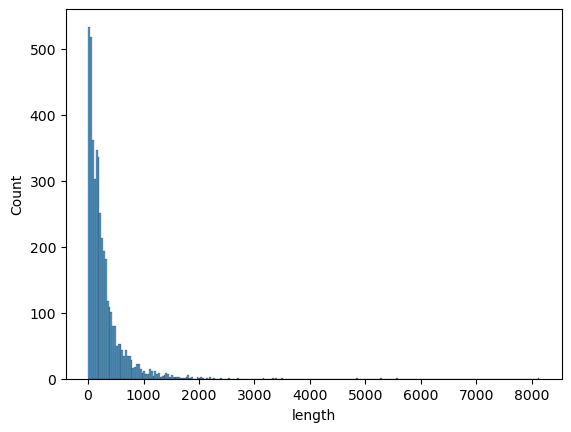

In [18]:
# New 
import seaborn as sns
ax = sns.histplot(data=df, x='length')
# ax.axvline(df['length'].mean(),color='k',ls=':')

<a name='regex'></a>
## ✨ Removing HTML From Reviews with Regex

In [19]:
df.loc[df['text-raw'].str.contains('http://')]

,asin,reviewerID,overall,year,category,text-raw,length
75,B007JINB0W,A1VDTM4ITCSHQ8,5.0,2016,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,"Great alternative to heavy strarches!: We have eaten shirataki noodles for many years because of my husbands diabetes, but this was our first time trying the shirataki Miracle Rice, and it was fantastic! (I actually like it more than the noodles.) Yes it does have a ocean smell when you first open them, but that is easily taken care of with a good rinse, and a quick boil in fresh water. It is not really a suitable product to eat on its own, but add some pasta sauce, pesto, or ? and you really cant taste the shirataki at all. In my home we use it as a substitute for any recipe we would use noodles or rice. Tonight we tried the Miracle Rice with the orange chicken recipe from Skinnytaste and it was excellent ( http://www.skinnytaste.com/2014/03/orange-chicken-makeover.html )",783
1473,B007JINB0W,A3J6ABN4ZOG502,5.0,2015,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,http: //www. amazon. com/gp/product/B007JINB0W?: http://www.amazon.com/gp/product/B007JINB0W?redirect=true&ref_=cm_cr_ryp_prd_ttl_sol_37,136
3816,B007JINB0W,A2PIOAUQSBG074,2.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,"Hard to chew....: I used to buy yam noodles in the local asian market. I love them and wanted to find them on Amazon, and they are (http://www.amazon.com/JFC-Brown-Shirataki-Yam-Noodles/dp/B002FDW6H0/ref=sr_1_cc_3?s=aps&ie=UTF8&qid=1395427420&sr=1-3-catcorr&keywords=yam+noodle?tag=smzdm0c01-20), but the shipping fee stops me from purchasing them. So I switch to this product. It is not at all comparable to my favourite one, which only requires one-min boil. I rinsed this product and boiled for more than 20 mins. Nothing changes, still taste like rubber and very hard to chew. Do not recommend. I should have one star. The additional one is for the good packaging.",668


- Regular expression figured out with Google Bard: https://g.co/bard/share/1db36656cbf3

- Tested out in this saved regex101 pattern: - https://regex101.com/r/01bd7q/3  with the values from below:



In [20]:
# Checking for raw html
df.loc[df['text-raw'].str.contains('<')]

asin      reviewerID  overall  year  \
164   B007JINB0W  A2M9IS41H1HJAI      5.0  2014   
266   B007JINB0W  A2AZR0HQEOAT8J      1.0  2013   
895   B007JINB0W    AN79B2EUCG5O      3.0  2015   
1172  B007JINB0W  A25Y0KLV7I19FA      5.0  2018   
1350  B007JINB0W  A3UEE22RNGQ2L8      5.0  2017   
1498  B007JINB0W  A237SW9SPH1DAD      5.0  2018   
1514  B007JINB0W  A14A4YYKPLYY26      2.0  2013   
2288  B007JINB0W  A1NF7CRBZD2AF8      5.0  2017   
2378  B007JINB0W  A14A4YYKPLYY26      5.0  2013   
2404  B007JINB0W  A1FFJRP833Y1MH      5.0  2017   
3056  B007JINB0W  A14A4YYKPLYY26      4.0  2013   
3577  B007JINB0W   AD4TI3BYQ6U7I      5.0  2016   

                                                         category  \
164   Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki   
266   Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki   
895   Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki   
1172  Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki   
1350  Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki   
1498  Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki   
1514  Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki   
2288  Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki   
2378  Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki   
2404  Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki   
3056  Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki   
3577  Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [21]:
# Copy/pasted these values into regex 101
df.loc[df['text-raw'].str.contains('<')]['text-raw'].values

array(['Follow the directions, and these will be really really good.: Quick update on 11/21/14\n\nJust started putting Old Bay Seasoning in the water that I boil these in. Seems to add some flavor to them but it also changes the color. Looks very close to the color of pasta!\n\n---------------\n\nIt\'s kind of sad to see so many have given these 1 star. Being someone who believes strongly in \'Low Carbs\' are healthy, I worked at learning how these should be cooked. Maybe many of the 1 star people didn\'t care that much?\n\nAlmost forgot to mention, the exp date on the ones I received today are Jul 2015.\n\nRinse them in a colander (cold water) for a minute or two, there should be no smell now. Boil them in a pot for 3 mins, then rinse again (pat dry with paper towels and try to squeeze out as much liquid as possible). Now put them in your already heated non stick skillet. I do this on a setting of 3 on the glass top stove.\n\nAt this point, because I\'ve never read where someone has s

In [22]:
import re

# Regular expression to match HTML tags
regex = r"<[^>]*>"

# Apply the regex to the DataFrame column using str.replace
df['text'] = df['text-raw'].str.replace(regex, '', regex=True)

In [23]:
pd.set_option('display.max_colwidth',250)

In [24]:

df.loc[df['text-raw'].str.contains('<'),['text-raw', 'text']]

,text-raw,text
164,"Follow the directions, and these will be really really good.: Quick update on 11/21/14\n\nJust started putting Old Bay Seasoning in the water that I boil these in. Seems to add some flavor to them but it also changes the color. Looks very close t...","Follow the directions, and these will be really really good.: Quick update on 11/21/14\n\nJust started putting Old Bay Seasoning in the water that I boil these in. Seems to add some flavor to them but it also changes the color. Looks very close t..."
266,"They're great, if you like eating rubber: Because they look and feel like exactly that: noodles made of transparent rubber. If you don't care or are planning in burying them in enough sauce you can't see them, go for it. Personally, I'm not that ...","They're great, if you like eating rubber: Because they look and feel like exactly that: noodles made of transparent rubber. If you don't care or are planning in burying them in enough sauce you can't see them, go for it. Personally, I'm not that ..."
895,"Be prepaired to experement to find the best way to eat them.: bought the variety pack... the rice and the angle hair are ok. I think for me they are thin/small enough to not be a substantial part of a bite, so less contribution to the mouth feel...","Be prepaired to experement to find the best way to eat them.: bought the variety pack... the rice and the angle hair are ok. I think for me they are thin/small enough to not be a substantial part of a bite, so less contribution to the mouth feel..."
1172,"Family love it !!!: <div id=""video-block-R2QVYQA389CT7S"" class=""a-section a-spacing-small a-spacing-top-mini video-block""></div><input type=""hidden"" name="""" value=""https://images-na.ssl-images-amazon.com/images/I/91E2G7ukhBS.mp4"" class=""video-url...",Family love it !!!: &nbsp;Love this stuff !!!! Guilt Free perfect if your in a weight loss journey like I am!!! Easy to cook !!!! Will order more
1350,"ZERO CALORIES, ZERO CARBS and EXACTLY like spaghetti. Miracle noodles, indeed. Changed my life!: This product has seriously changed my LIFE. I fight every day to keep my weight at its current level, and I simply must avoid carbs. The conflict is ...","ZERO CALORIES, ZERO CARBS and EXACTLY like spaghetti. Miracle noodles, indeed. Changed my life!: This product has seriously changed my LIFE. I fight every day to keep my weight at its current level, and I simply must avoid carbs. The conflict is ..."
1498,"These make your plate ""full"" and plenty.: Holly guacamole, I love these things! Follow instructions and get creative with spices and sauces. The ""funky"" smell so many have mentioned is no big deal and goes away. Texture is good, specially if you ...","These make your plate ""full"" and plenty.: Holly guacamole, I love these things! Follow instructions and get creative with spices and sauces. The ""funky"" smell so many have mentioned is no big deal and goes away. Texture is good, specially if you ..."
1514,"Meh! Disappointing..............Tastes NOTHING Like Real Rice!!!: When I decided to buy this&nbsp;<a data-hook=""product-link-linked"" class=""a-link-normal"" href=""/Miracle-Noodle-Rice/dp/B00BP36S7U/ref=cm_cr_arp_d_rvw_txt?ie=UTF8"">Miracle Noodle Ri...","Meh! Disappointing..............Tastes NOTHING Like Real Rice!!!: When I decided to buy this&nbsp;Miracle Noodle Rice&nbsp;I did so, after having bought the&nbsp;Miracle Noodle Angel Hair Pasta&nbsp;and ABSOLUTELY LOVING it. Because I am on a&nbs..."
2288,"Great product.: Great product.<a data-hook=""product-link-linked"" class=""a-link-normal"" href=""/Miracle-Noodle-Zero-Carb-Gluten-Free-Shirataki-Pasta-and-Rice-6-bag-Variety-Pack-44-ounces-Includes-2-Shirataki-Angel-Hair-2-Shirataki-Rice-and-2-Shirat...","Great product.: Great product.Miracle Noodle Zero Carb, Gluten Free Shirataki Pasta and Rice, 6 bag Variety Pack, 44 ounces (Includes: 2 Shirataki Angel Hair, 2 Shirataki Rice and 2 Shirataki Fettuccini)"
2378,"I Can Have Noodles Again! Now, If 

# Text Normalization with NLTK

## Normalizing Casing

It's common practice to lower the casing of the text in our documents to contribut to normalizing.

In [25]:
## Lower the casing of each document
df['lower_text'] = df['text'].str.lower()
df.head()

,asin,reviewerID,overall,year,category,text-raw,length,text,lower_text
0,B007JINB0W,A1P9BVW2JB1OVL,3.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...",291,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...","odd chewy texture: this has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. i can tolerate it, but it isn't really tasty. surprisingly, my husband enjoyed it more than i did. i just co..."
1,B007JINB0W,A5JZ2DBS9H3F6,1.0,2016,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,77,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,fishy gross: they smell of fish and have a rubbery hard to chew texture. yuck
2,B007JINB0W,A3VYMBAX7IFV3B,1.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,One Star: MOM DID NOT LIKE THESE,32,One Star: MOM DID NOT LIKE THESE,one star: mom did not like these
3,B007JINB0W,A25MLB8QXVM2LS,2.0,2018,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,289,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,the noodles themselves are fine. the amazon label description claims they are certified ...: the noodles themselves are fine. the amazon label description claims they are certified non gmo and vegan but the actual package contains no such symbol ...
4,B007JINB0W,A2DZN9RBFVVY7L,4.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,"What's important to you?: So how bad do you want to restrict your calories? I gain weight easily, so I'm obsessive about counting my calories, but many times I am left not feeling very full. I read about these noodles and decided to give them a t...",882,"What's important to you?: So how bad do you want to restrict your calories? I gain weight easily, so I'm obsessive about counting my calories, but many times I am left not feeling very full. I read about these noodles and decided to give them a t...","what's important to you?: so how bad do you want to restrict your calories? i gain weight easily, so i'm obsessive about counting my calories, but many times i am left not feeling very full. i read about these noodles and decided to give them a t..."


## Tokenizing

Tokenizing text into single word tokens is simple in Python.  We can just use `str.split()`.  The default separator for `.split()` is one space, so `' '`.

We can access Pandas' string accessor with `df.str.<method>`.  This allows us to apply string methods to all rows in a column.

When processing text, if memory allows, it can be useful to keep many versions of your text: tokenize, lemmatized, no stop words, etc.  Some analysis or modeling packages expect tokenized data and others do not.  We often want to use different versions for different kinds of analysis, too.

In [26]:
## Split the documents into tokens

df['tokens'] = df['lower_text'].str.split()
df.head()

,asin,reviewerID,overall,year,category,text-raw,length,text,lower_text,tokens
0,B007JINB0W,A1P9BVW2JB1OVL,3.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...",291,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...","odd chewy texture: this has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. i can tolerate it, but it isn't really tasty. surprisingly, my husband enjoyed it more than i did. i just co...","[odd, chewy, texture:, this, has, a, odd, chewy, texture, and, not, much, flavor,, but, used, as, a, substitute, for, pasta,, it, helps, cut, calories, and, carbs., i, can, tolerate, it,, but, it, isn't, really, tasty., surprisingly,, my, husband..."
1,B007JINB0W,A5JZ2DBS9H3F6,1.0,2016,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,77,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,fishy gross: they smell of fish and have a rubbery hard to chew texture. yuck,"[fishy, gross:, they, smell, of, fish, and, have, a, rubbery, hard, to, chew, texture., yuck]"
2,B007JINB0W,A3VYMBAX7IFV3B,1.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,One Star: MOM DID NOT LIKE THESE,32,One Star: MOM DID NOT LIKE THESE,one star: mom did not like these,"[one, star:, mom, did, not, like, these]"
3,B007JINB0W,A25MLB8QXVM2LS,2.0,2018,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,289,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,the noodles themselves are fine. the amazon label description claims they are certified ...: the noodles themselves are fine. the amazon label description claims they are certified non gmo and vegan but the actual package contains no such symbol ...,"[the, noodles, themselves, are, fine., the, amazon, label, description, claims, they, are, certified, ...:, the, noodles, themselves, are, fine., the, amazon, label, description, claims, they, are, certified, non, gmo, and, vegan, but, the, actua..."
4,B007JINB0W,A2DZN9RBFVVY7L,4.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,"What's important to you?: So how bad do you want to restrict your calories? I gain weight easily, so I'm obsessive about counting my calories, but many times I am left not feeling very full. I read about these noodles and decided to give them a t...",882,"What's important to you?: So how bad do you want to restrict your calories? I gain weight easily, so I'm obsessive about counting my calories, but many times I am left not feeling very full. I read about these noodles and decided to give them a t...","what's important to you?: so how bad do you want to restrict your calories? i gain weight easily, so i'm obsessive about counting my calories, but many times i am left not feeling very full. i read about these noodles and decided to give them a t...","[what's, important, to, you?:, so, how, bad, do, you, want, to, restrict, your, calories?, i, gain, weight, easily,, so, i'm, obsessive, about, counting, my, calories,, but, many, t

### Better way to tokenize data

NLTK has a more sophisticated tokenization function that will isolate things like punctuation as well.  This way 'hooray' and 'hooray!!!' will be the same token.

In order for NLTK to recognize the punctuation, we will need to download the 'punkt' data.

In [27]:
## Download punkt
nltk.download('punkt')

## Tokenize with nltk.word_tokenize instead

df['tokens'] = df['lower_text'].apply(nltk.word_tokenize)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/codingdojo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,asin,reviewerID,overall,year,category,text-raw,length,text,lower_text,tokens
0,B007JINB0W,A1P9BVW2JB1OVL,3.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...",291,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...","odd chewy texture: this has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. i can tolerate it, but it isn't really tasty. surprisingly, my husband enjoyed it more than i did. i just co...","[odd, chewy, texture, :, this, has, a, odd, chewy, texture, and, not, much, flavor, ,, but, used, as, a, substitute, for, pasta, ,, it, helps, cut, calories, and, carbs, ., i, can, tolerate, it, ,, but, it, is, n't, really, tasty, ., surprisingly..."
1,B007JINB0W,A5JZ2DBS9H3F6,1.0,2016,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,77,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,fishy gross: they smell of fish and have a rubbery hard to chew texture. yuck,"[fishy, gross, :, they, smell, of, fish, and, have, a, rubbery, hard, to, chew, texture, ., yuck]"
2,B007JINB0W,A3VYMBAX7IFV3B,1.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,One Star: MOM DID NOT LIKE THESE,32,One Star: MOM DID NOT LIKE THESE,one star: mom did not like these,"[one, star, :, mom, did, not, like, these]"
3,B007JINB0W,A25MLB8QXVM2LS,2.0,2018,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,289,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,the noodles themselves are fine. the amazon label description claims they are certified ...: the noodles themselves are fine. the amazon label description claims they are certified non gmo and vegan but the actual package contains no such symbol ...,"[the, noodles, themselves, are, fine, ., the, amazon, label, description, claims, they, are, certified, ..., :, the, noodles, themselves, are, fine, ., the, amazon, label, description, claims, they, are, certified, non, gmo, and, vegan, but, the,..."
4,B007JINB0W,A2DZN9RBFVVY7L,4.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,"What's important to you?: So how bad do you want to restrict your calories? I gain weight easily, so I'm obsessive about counting my calories, but many times I am left not feeling very full. I read about these noodles and decided to give them a t...",882,"What's important to you?: So how bad do you want to restrict your calories? I gain weight easily, so I'm obsessive about counting my calories, but many times I am left not feeling very full. I read about these noodles and decided to give them a t...","what's important to you?: so how bad do you want to restrict your calories? i gain weight easily, so i'm obsessive about counting my calories, but many times i am left not feeling very full. i read about these noodles and decided to give them a t...","[what, 's, important, to, you, ?, :, so, how, bad, do, you, want, to, restrict, your, calories, ?, i, gain, weight, easily, ,, so, i, 'm, obsessive, about, counting, my, calor

## Remove Stop Words

In [28]:
## Download NLTK stopword list
nltk.download('stopwords')

## Load the English stop words.

stop_words = nltk.corpus.stopwords.words('english')
stop_words[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/codingdojo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

<font color=red> NOTICE </font> that all of the stop words are lower case.  It's necessary to ensure that your tokens are all lower case before using this list to remove stop words.

To remove the stop words from each document, we will apply a function that will check each word in the list of tokens against the list of stopwords and remove them if they are in the list.  More specifically, it will only save them if they are NOT in the list.

In [29]:
## Create function to remove stop words
def remove_stopwords(tokens):
    # no_stops = []
    # for token in tokens:
    #     if token not in stop_words:
    #         no_stops.append(token)

    no_stops = [token for token in tokens if token not in stop_words]
    
    return no_stops
    
## Apply the function to the tokenized data

df['no_stops'] = df['tokens'].map(remove_stopwords)
df.head(10)




,asin,reviewerID,overall,year,category,text-raw,length,text,lower_text,tokens,no_stops
0,B007JINB0W,A1P9BVW2JB1OVL,3.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...",291,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...","odd chewy texture: this has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. i can tolerate it, but it isn't really tasty. surprisingly, my husband enjoyed it more than i did. i just co...","[odd, chewy, texture, :, this, has, a, odd, chewy, texture, and, not, much, flavor, ,, but, used, as, a, substitute, for, pasta, ,, it, helps, cut, calories, and, carbs, ., i, can, tolerate, it, ,, but, it, is, n't, really, tasty, ., surprisingly...","[odd, chewy, texture, :, odd, chewy, texture, much, flavor, ,, used, substitute, pasta, ,, helps, cut, calories, carbs, ., tolerate, ,, n't, really, tasty, ., surprisingly, ,, husband, enjoyed, ., could, n't, get, past, texture, (, rubber, noodle..."
1,B007JINB0W,A5JZ2DBS9H3F6,1.0,2016,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,77,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,fishy gross: they smell of fish and have a rubbery hard to chew texture. yuck,"[fishy, gross, :, they, smell, of, fish, and, have, a, rubbery, hard, to, chew, texture, ., yuck]","[fishy, gross, :, smell, fish, rubbery, hard, chew, texture, ., yuck]"
2,B007JINB0W,A3VYMBAX7IFV3B,1.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,One Star: MOM DID NOT LIKE THESE,32,One Star: MOM DID NOT LIKE THESE,one star: mom did not like these,"[one, star, :, mom, did, not, like, these]","[one, star, :, mom, like]"
3,B007JINB0W,A25MLB8QXVM2LS,2.0,2018,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,289,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,the noodles themselves are fine. the amazon label description claims they are certified ...: the noodles themselves are fine. the amazon label description claims they are certified non gmo and vegan but the actual package contains no such symbol ...,"[the, noodles, themselves, are, fine, ., the, amazon, label, description, claims, they, are, certified, ..., :, the, noodles, themselves, are, fine, ., the, amazon, label, description, claims, they, are, certified, non, gmo, and, vegan, but, the,...","[noodles, fine, ., amazon, label, description, claims, certified, ..., :, noodles, fine, ., amazon, label, description, claims, certified, non, gmo, vegan, actual, package, contains, symbol, claim, online, description, shows, .]"
4,B007JINB0W,A2DZN9RBFVVY7L,4.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,"What's important to you?: So how bad do you want to restrict your calories? I gain weight easily, so I'm obsessive about counting my calories, but many times I am left not feeling very full. I read about these noodles and decided to give them a t...",882,"What's important to you?: So how bad do you want to restrict your calories? I gain weig

## Remove Punctuation

We can remove punctuation in a similar that we removed stop words.  However, we will get our list of punctuation from the built in Python string library.

In [30]:
## Import built-in String Libary
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [31]:
## Create function to remove punctuation tokens

def remove_punct(tokens):
    no_punct = []
    for token in tokens:
        if token not in punctuation:
            no_punct.append(token)
    return no_punct

## Apply the function to the tokens without punctuation

df['no_stops_no_punct'] = df['no_stops'].apply(remove_punct)
df.head(10)

,asin,reviewerID,overall,year,category,text-raw,length,text,lower_text,tokens,no_stops,no_stops_no_punct
0,B007JINB0W,A1P9BVW2JB1OVL,3.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...",291,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...","odd chewy texture: this has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. i can tolerate it, but it isn't really tasty. surprisingly, my husband enjoyed it more than i did. i just co...","[odd, chewy, texture, :, this, has, a, odd, chewy, texture, and, not, much, flavor, ,, but, used, as, a, substitute, for, pasta, ,, it, helps, cut, calories, and, carbs, ., i, can, tolerate, it, ,, but, it, is, n't, really, tasty, ., surprisingly...","[odd, chewy, texture, :, odd, chewy, texture, much, flavor, ,, used, substitute, pasta, ,, helps, cut, calories, carbs, ., tolerate, ,, n't, really, tasty, ., surprisingly, ,, husband, enjoyed, ., could, n't, get, past, texture, (, rubber, noodle...","[odd, chewy, texture, odd, chewy, texture, much, flavor, used, substitute, pasta, helps, cut, calories, carbs, tolerate, n't, really, tasty, surprisingly, husband, enjoyed, could, n't, get, past, texture, rubber, noodles]"
1,B007JINB0W,A5JZ2DBS9H3F6,1.0,2016,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,77,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,fishy gross: they smell of fish and have a rubbery hard to chew texture. yuck,"[fishy, gross, :, they, smell, of, fish, and, have, a, rubbery, hard, to, chew, texture, ., yuck]","[fishy, gross, :, smell, fish, rubbery, hard, chew, texture, ., yuck]","[fishy, gross, smell, fish, rubbery, hard, chew, texture, yuck]"
2,B007JINB0W,A3VYMBAX7IFV3B,1.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,One Star: MOM DID NOT LIKE THESE,32,One Star: MOM DID NOT LIKE THESE,one star: mom did not like these,"[one, star, :, mom, did, not, like, these]","[one, star, :, mom, like]","[one, star, mom, like]"
3,B007JINB0W,A25MLB8QXVM2LS,2.0,2018,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,289,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,the noodles themselves are fine. the amazon label description claims they are certified ...: the noodles themselves are fine. the amazon label description claims they are certified non gmo and vegan but the actual package contains no such symbol ...,"[the, noodles, themselves, are, fine, ., the, amazon, label, description, claims, they, are, certified, ..., :, the, noodles, themselves, are, fine, ., the, amazon, label, description, claims, they, are, certified, non, gmo, and, vegan, but, the,...","[noodles, fine, ., amazon, label, description, claims, certified, ..., :, noodles, fine, ., amazon, label, description, claims, certified, non, gmo, vegan, actual, package, contains, symbol, claim, online, description, shows, .]","[noodles, fine, amazon, label, description, claims, certified, ..., noodles, fine, amazon, label, descripti

## Remove URLs

In [32]:
## [v3 For Loop - Continue] Define function to remove URLs
def remove_urls(token_list):
    no_urls = []
    for token in token_list:
        if ('http' in token) | ('www' in token):
            continue
        no_urls.append(token)
    return no_urls

## Remove URLs from no_stops_no_punct
df['no_stops_no_punct'] = df['no_stops_no_punct'].apply(remove_urls)
df.head(10)


,asin,reviewerID,overall,year,category,text-raw,length,text,lower_text,tokens,no_stops,no_stops_no_punct
0,B007JINB0W,A1P9BVW2JB1OVL,3.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...",291,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...","odd chewy texture: this has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. i can tolerate it, but it isn't really tasty. surprisingly, my husband enjoyed it more than i did. i just co...","[odd, chewy, texture, :, this, has, a, odd, chewy, texture, and, not, much, flavor, ,, but, used, as, a, substitute, for, pasta, ,, it, helps, cut, calories, and, carbs, ., i, can, tolerate, it, ,, but, it, is, n't, really, tasty, ., surprisingly...","[odd, chewy, texture, :, odd, chewy, texture, much, flavor, ,, used, substitute, pasta, ,, helps, cut, calories, carbs, ., tolerate, ,, n't, really, tasty, ., surprisingly, ,, husband, enjoyed, ., could, n't, get, past, texture, (, rubber, noodle...","[odd, chewy, texture, odd, chewy, texture, much, flavor, used, substitute, pasta, helps, cut, calories, carbs, tolerate, n't, really, tasty, surprisingly, husband, enjoyed, could, n't, get, past, texture, rubber, noodles]"
1,B007JINB0W,A5JZ2DBS9H3F6,1.0,2016,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,77,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,fishy gross: they smell of fish and have a rubbery hard to chew texture. yuck,"[fishy, gross, :, they, smell, of, fish, and, have, a, rubbery, hard, to, chew, texture, ., yuck]","[fishy, gross, :, smell, fish, rubbery, hard, chew, texture, ., yuck]","[fishy, gross, smell, fish, rubbery, hard, chew, texture, yuck]"
2,B007JINB0W,A3VYMBAX7IFV3B,1.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,One Star: MOM DID NOT LIKE THESE,32,One Star: MOM DID NOT LIKE THESE,one star: mom did not like these,"[one, star, :, mom, did, not, like, these]","[one, star, :, mom, like]","[one, star, mom, like]"
3,B007JINB0W,A25MLB8QXVM2LS,2.0,2018,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,289,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,the noodles themselves are fine. the amazon label description claims they are certified ...: the noodles themselves are fine. the amazon label description claims they are certified non gmo and vegan but the actual package contains no such symbol ...,"[the, noodles, themselves, are, fine, ., the, amazon, label, description, claims, they, are, certified, ..., :, the, noodles, themselves, are, fine, ., the, amazon, label, description, claims, they, are, certified, non, gmo, and, vegan, but, the,...","[noodles, fine, ., amazon, label, description, claims, certified, ..., :, noodles, fine, ., amazon, label, description, claims, certified, non, gmo, vegan, actual, package, contains, symbol, claim, online, description, shows, .]","[noodles, fine, amazon, label, description, claims, certified, ..., noodles, fine, amazon, label, descripti

## Results

Note how many fewer tokens we have in our `no_stops_no_punct` tokens than in our original.  However, some information was lost, but a lot was also retained.  

Normalization is a huge part of the NLP process and is always a balance between reducing the size of our vocabulary and therefor simplifying our models, and retaining enough information for the model to extract some meaningful patterns in the texts.  

There are a lot of choices here to make.

# Normalizing Text with spaCy

The spaCy Python package provides text processing pipelines that can do many of these operations, plus much more complicated processing, very fast and in many fewer steps.  For this reason it is a very popular tool.  

It utilizes pretrained language models that can recognize things like parts of speech and named entities (people, specific places, currency, etc.)

spaCy was not included in your original dojo_env, so you will need to install if if you have not already.

We will also download the pretrained english language model trained on millions of web documents.  We will use the small sized one for efficiency.

In [33]:
## Install spacy if necessary
#!pip install spacy

import spacy

## Download the English small-sized model trained on web documents if necessary
# spacy.cli.download('en_core_web_sm')

## The spaCy model

In [34]:
## Load the model.  Disable Named Entity Recognizer (too slow)
nlp_model = spacy.load('en_core_web_sm', disable='ner')

## Display the names of each tranformer pipe
nlp_model.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer']

We have our model, and we can apply it like a function.  It expects a string of text as the input.

In [35]:
df.head()

,asin,reviewerID,overall,year,category,text-raw,length,text,lower_text,tokens,no_stops,no_stops_no_punct
0,B007JINB0W,A1P9BVW2JB1OVL,3.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...",291,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...","odd chewy texture: this has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. i can tolerate it, but it isn't really tasty. surprisingly, my husband enjoyed it more than i did. i just co...","[odd, chewy, texture, :, this, has, a, odd, chewy, texture, and, not, much, flavor, ,, but, used, as, a, substitute, for, pasta, ,, it, helps, cut, calories, and, carbs, ., i, can, tolerate, it, ,, but, it, is, n't, really, tasty, ., surprisingly...","[odd, chewy, texture, :, odd, chewy, texture, much, flavor, ,, used, substitute, pasta, ,, helps, cut, calories, carbs, ., tolerate, ,, n't, really, tasty, ., surprisingly, ,, husband, enjoyed, ., could, n't, get, past, texture, (, rubber, noodle...","[odd, chewy, texture, odd, chewy, texture, much, flavor, used, substitute, pasta, helps, cut, calories, carbs, tolerate, n't, really, tasty, surprisingly, husband, enjoyed, could, n't, get, past, texture, rubber, noodles]"
1,B007JINB0W,A5JZ2DBS9H3F6,1.0,2016,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,77,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,fishy gross: they smell of fish and have a rubbery hard to chew texture. yuck,"[fishy, gross, :, they, smell, of, fish, and, have, a, rubbery, hard, to, chew, texture, ., yuck]","[fishy, gross, :, smell, fish, rubbery, hard, chew, texture, ., yuck]","[fishy, gross, smell, fish, rubbery, hard, chew, texture, yuck]"
2,B007JINB0W,A3VYMBAX7IFV3B,1.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,One Star: MOM DID NOT LIKE THESE,32,One Star: MOM DID NOT LIKE THESE,one star: mom did not like these,"[one, star, :, mom, did, not, like, these]","[one, star, :, mom, like]","[one, star, mom, like]"
3,B007JINB0W,A25MLB8QXVM2LS,2.0,2018,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,289,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,the noodles themselves are fine. the amazon label description claims they are certified ...: the noodles themselves are fine. the amazon label description claims they are certified non gmo and vegan but the actual package contains no such symbol ...,"[the, noodles, themselves, are, fine, ., the, amazon, label, description, claims, they, are, certified, ..., :, the, noodles, themselves, are, fine, ., the, amazon, label, description, claims, they, are, certified, non, gmo, and, vegan, but, the,...","[noodles, fine, ., amazon, label, description, claims, certified, ..., :, noodles, fine, ., amazon, label, description, claims, certified, non, gmo, vegan, actual, package, contains, symbol, claim, online, description, shows, .]","[noodles, fine, amazon, label, description, claims, certified, ..., noodles, fine, amazon, label, descripti

In [36]:
# New
idx_example = 286#2873
raw_text = df.loc[idx_example,'text']
raw_text

'Two Stars: Just cant get used to the texture or flavor.'

In [37]:
## Process a document with the model
doc = nlp_model(raw_text)
doc

Two Stars: Just cant get used to the texture or flavor.

The document is a collection of tokens we can iterate over

## Documents and Tokens

In [38]:
## Display the tokens in the document

[token for token in doc]

[Two, Stars, :, Just, ca, nt, get, used, to, the, texture, or, flavor, .]

Each token is much more than a string.  It

In [39]:
## Isolate the last token in the document
doc = nlp_model("I thought I did my homework but I forgot I was running late and didn't finish.")
word = doc[-4]

## Display the text and type of the token
print(word)
type(word)

did


spacy.tokens.token.Token

Each has many attributes that we can take advantage of, such as the lemma form and whether it is punctuation or space, and whether it is a stop word

In [40]:
## Display the lemmatized form of the token

word.lemma_

'do'

In [41]:
## Check whether the token is punctuation
word.is_punct


False

In [42]:
## Check whether the token is a space
word.is_space

False

Spacy can even determine the part of speech that the token is!

In [43]:
## Check the part of speech of the token
word.pos_

'AUX'

In [44]:
## Show the parts of speech for each token in the document

[token.pos_ for token in doc]

['PRON',
 'VERB',
 'PRON',
 'VERB',
 'PRON',
 'NOUN',
 'CCONJ',
 'PRON',
 'VERB',
 'PRON',
 'AUX',
 'VERB',
 'ADV',
 'CCONJ',
 'AUX',
 'PART',
 'VERB',
 'PUNCT']

In [45]:
## Show a list of the lemmas for each token in the document

[token.lemma_ for token in doc]

['I',
 'think',
 'I',
 'do',
 'my',
 'homework',
 'but',
 'I',
 'forget',
 'I',
 'be',
 'run',
 'late',
 'and',
 'do',
 'not',
 'finish',
 '.']

Notice that spaCy does not lower the case of lemmas.  Let's make sure we do that, too.

In [46]:
## Show a list of only the tokens in the document that are not punctuation or spaces or URLs
lemmas_list = []
for token in doc:
    if token.is_punct:
        continue
    if token.is_space:
        continue
    if token.is_stop:
        continue

    lemmas_list.append(token.lemma_.lower())

lemmas_list


['think', 'homework', 'forget', 'run', 'late', 'finish']

In [47]:
## Show a list of all the tokens in the document that are not punctuation, spaces, or stop words
[token.lemma_.lower() for token in doc if 
 not token.is_punct and 
 not token.is_space and 
 not token.is_stop]

['think', 'homework', 'forget', 'run', 'late', 'finish']

In order to use spaCy to process our entire dataframe, we will need to make a function and apply it to our text column.

In [48]:
## Let's also remove URLs
## Let's also remove the url
[token.lemma_.lower() for token in doc if 
 not token.is_punct and 
 not token.is_space and 
 not token.is_stop and 
 not 'http' in token.lemma_.lower() and
 not 'www' in token.lemma_.lower()]

['think', 'homework', 'forget', 'run', 'late', 'finish']

## Preprocessing with spaCy

In [49]:
## Define a function to use spacy to process our text
def spacy_process(text):
        """Lemmatize tokens, lower case, remove punctuation, spaces, and stop words"""
        doc = nlp_model(text)
        processed_doc = [token.lemma_.lower() 
                         for token in doc if not token.is_punct and 
                         not token.is_space and not token.is_stop and 
                         not 'http' in token.lemma_.lower() and 'www' not in token.lemma_.lower()]
        return processed_doc

## process the tweets using the spacy function
df['spacy_lemmas'] = df['text'].apply(spacy_process)
df.head()

,asin,reviewerID,overall,year,category,text-raw,length,text,lower_text,tokens,no_stops,no_stops_no_punct,spacy_lemmas
0,B007JINB0W,A1P9BVW2JB1OVL,3.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...",291,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...","odd chewy texture: this has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. i can tolerate it, but it isn't really tasty. surprisingly, my husband enjoyed it more than i did. i just co...","[odd, chewy, texture, :, this, has, a, odd, chewy, texture, and, not, much, flavor, ,, but, used, as, a, substitute, for, pasta, ,, it, helps, cut, calories, and, carbs, ., i, can, tolerate, it, ,, but, it, is, n't, really, tasty, ., surprisingly...","[odd, chewy, texture, :, odd, chewy, texture, much, flavor, ,, used, substitute, pasta, ,, helps, cut, calories, carbs, ., tolerate, ,, n't, really, tasty, ., surprisingly, ,, husband, enjoyed, ., could, n't, get, past, texture, (, rubber, noodle...","[odd, chewy, texture, odd, chewy, texture, much, flavor, used, substitute, pasta, helps, cut, calories, carbs, tolerate, n't, really, tasty, surprisingly, husband, enjoyed, could, n't, get, past, texture, rubber, noodles]","[odd, chewy, texture, odd, chewy, texture, flavor, substitute, pasta, help, cut, calorie, carb, tolerate, tasty, surprisingly, husband, enjoy, past, texture, rubber, noodle]"
1,B007JINB0W,A5JZ2DBS9H3F6,1.0,2016,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,77,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,fishy gross: they smell of fish and have a rubbery hard to chew texture. yuck,"[fishy, gross, :, they, smell, of, fish, and, have, a, rubbery, hard, to, chew, texture, ., yuck]","[fishy, gross, :, smell, fish, rubbery, hard, chew, texture, ., yuck]","[fishy, gross, smell, fish, rubbery, hard, chew, texture, yuck]","[fishy, gross, smell, fish, rubbery, hard, chew, texture, yuck]"
2,B007JINB0W,A3VYMBAX7IFV3B,1.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,One Star: MOM DID NOT LIKE THESE,32,One Star: MOM DID NOT LIKE THESE,one star: mom did not like these,"[one, star, :, mom, did, not, like, these]","[one, star, :, mom, like]","[one, star, mom, like]","[star, mom, like]"
3,B007JINB0W,A25MLB8QXVM2LS,2.0,2018,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,289,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,the noodles themselves are fine. the amazon label description claims they are certified ...: the noodles themselves are fine. the amazon label description claims they are certified non gmo and vegan but the actual package contains no such symbol ...,"[the, noodles, themselves, are, fine, ., the, amazon, label, description, claims, they, are, certified, ..., :, the, noodles, themselves, are, fine, ., the, amazon, label, description, claims, they, are, certified, non, gmo, and, vegan, but, the,...","[noodles, fine, ., amazon, label, description, claims, certifie

We used spaCy to tokenize, lemmatize, and remove punctuation and stopwords from our text in one step!

Notice that the spaCy processed data is a little different than our previously processed data.  The text has been lemmatized and spaCy has a different list of stop words than NLTK.

The learn platform has directions for how you can customize your spaCy stopword list and a function with more flexibility in how spaCy will process your data.

# ngrams
combine multiple words into tokens

In [50]:
## Import the ngrams function
from nltk import ngrams

In [51]:

## Isolate the 6th lemmatized document


In [52]:

# Create list of bigrams


In [53]:

# Create list of trigrams



## Applying `ngrams` to make a new column



We need to make a function that returns a list of bigrams.  It won't work to just pass the ngrams function to `.apply()`


In [54]:
## Create a function to create bigrams
def make_bigrams(doc):
    bigrams = ngrams(doc, 2)
    bigrams = list(bigrams)
    return bigrams

In [55]:
# add bigrams to the df with .apply()
df['bigrams'] = df['spacy_lemmas'].apply(make_bigrams)
df.head()

,asin,reviewerID,overall,year,category,text-raw,length,text,lower_text,tokens,no_stops,no_stops_no_punct,spacy_lemmas,bigrams
0,B007JINB0W,A1P9BVW2JB1OVL,3.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...",291,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...","odd chewy texture: this has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. i can tolerate it, but it isn't really tasty. surprisingly, my husband enjoyed it more than i did. i just co...","[odd, chewy, texture, :, this, has, a, odd, chewy, texture, and, not, much, flavor, ,, but, used, as, a, substitute, for, pasta, ,, it, helps, cut, calories, and, carbs, ., i, can, tolerate, it, ,, but, it, is, n't, really, tasty, ., surprisingly...","[odd, chewy, texture, :, odd, chewy, texture, much, flavor, ,, used, substitute, pasta, ,, helps, cut, calories, carbs, ., tolerate, ,, n't, really, tasty, ., surprisingly, ,, husband, enjoyed, ., could, n't, get, past, texture, (, rubber, noodle...","[odd, chewy, texture, odd, chewy, texture, much, flavor, used, substitute, pasta, helps, cut, calories, carbs, tolerate, n't, really, tasty, surprisingly, husband, enjoyed, could, n't, get, past, texture, rubber, noodles]","[odd, chewy, texture, odd, chewy, texture, flavor, substitute, pasta, help, cut, calorie, carb, tolerate, tasty, surprisingly, husband, enjoy, past, texture, rubber, noodle]","[(odd, chewy), (chewy, texture), (texture, odd), (odd, chewy), (chewy, texture), (texture, flavor), (flavor, substitute), (substitute, pasta), (pasta, help), (help, cut), (cut, calorie), (calorie, carb), (carb, tolerate), (tolerate, tasty), (tast..."
1,B007JINB0W,A5JZ2DBS9H3F6,1.0,2016,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,77,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,fishy gross: they smell of fish and have a rubbery hard to chew texture. yuck,"[fishy, gross, :, they, smell, of, fish, and, have, a, rubbery, hard, to, chew, texture, ., yuck]","[fishy, gross, :, smell, fish, rubbery, hard, chew, texture, ., yuck]","[fishy, gross, smell, fish, rubbery, hard, chew, texture, yuck]","[fishy, gross, smell, fish, rubbery, hard, chew, texture, yuck]","[(fishy, gross), (gross, smell), (smell, fish), (fish, rubbery), (rubbery, hard), (hard, chew), (chew, texture), (texture, yuck)]"
2,B007JINB0W,A3VYMBAX7IFV3B,1.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,One Star: MOM DID NOT LIKE THESE,32,One Star: MOM DID NOT LIKE THESE,one star: mom did not like these,"[one, star, :, mom, did, not, like, these]","[one, star, :, mom, like]","[one, star, mom, like]","[star, mom, like]","[(star, mom), (mom, like)]"
3,B007JINB0W,A25MLB8QXVM2LS,2.0,2018,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,289,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,the noodles themselves are fine. the amazon label description claims they are certified ...: the noodles themselves are fine. the amazon label de


# Save the final data version for modeling


In [56]:
df.head()

,asin,reviewerID,overall,year,category,text-raw,length,text,lower_text,tokens,no_stops,no_stops_no_punct,spacy_lemmas,bigrams
0,B007JINB0W,A1P9BVW2JB1OVL,3.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...",291,"Odd chewy texture: This has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. I can tolerate it, but it isn't really tasty. Surprisingly, my husband enjoyed it more than I did. I just co...","odd chewy texture: this has a odd chewy texture and not much flavor, but used as a substitute for pasta, it helps cut calories and carbs. i can tolerate it, but it isn't really tasty. surprisingly, my husband enjoyed it more than i did. i just co...","[odd, chewy, texture, :, this, has, a, odd, chewy, texture, and, not, much, flavor, ,, but, used, as, a, substitute, for, pasta, ,, it, helps, cut, calories, and, carbs, ., i, can, tolerate, it, ,, but, it, is, n't, really, tasty, ., surprisingly...","[odd, chewy, texture, :, odd, chewy, texture, much, flavor, ,, used, substitute, pasta, ,, helps, cut, calories, carbs, ., tolerate, ,, n't, really, tasty, ., surprisingly, ,, husband, enjoyed, ., could, n't, get, past, texture, (, rubber, noodle...","[odd, chewy, texture, odd, chewy, texture, much, flavor, used, substitute, pasta, helps, cut, calories, carbs, tolerate, n't, really, tasty, surprisingly, husband, enjoyed, could, n't, get, past, texture, rubber, noodles]","[odd, chewy, texture, odd, chewy, texture, flavor, substitute, pasta, help, cut, calorie, carb, tolerate, tasty, surprisingly, husband, enjoy, past, texture, rubber, noodle]","[(odd, chewy), (chewy, texture), (texture, odd), (odd, chewy), (chewy, texture), (texture, flavor), (flavor, substitute), (substitute, pasta), (pasta, help), (help, cut), (cut, calorie), (calorie, carb), (carb, tolerate), (tolerate, tasty), (tast..."
1,B007JINB0W,A5JZ2DBS9H3F6,1.0,2016,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,77,Fishy gross: They smell of fish and have a rubbery hard to chew texture. Yuck,fishy gross: they smell of fish and have a rubbery hard to chew texture. yuck,"[fishy, gross, :, they, smell, of, fish, and, have, a, rubbery, hard, to, chew, texture, ., yuck]","[fishy, gross, :, smell, fish, rubbery, hard, chew, texture, ., yuck]","[fishy, gross, smell, fish, rubbery, hard, chew, texture, yuck]","[fishy, gross, smell, fish, rubbery, hard, chew, texture, yuck]","[(fishy, gross), (gross, smell), (smell, fish), (fish, rubbery), (rubbery, hard), (hard, chew), (chew, texture), (texture, yuck)]"
2,B007JINB0W,A3VYMBAX7IFV3B,1.0,2014,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,One Star: MOM DID NOT LIKE THESE,32,One Star: MOM DID NOT LIKE THESE,one star: mom did not like these,"[one, star, :, mom, did, not, like, these]","[one, star, :, mom, like]","[one, star, mom, like]","[star, mom, like]","[(star, mom), (mom, like)]"
3,B007JINB0W,A25MLB8QXVM2LS,2.0,2018,Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,289,The noodles themselves are fine. The Amazon label description claims they are certified ...: The noodles themselves are fine. The Amazon label description claims they are certified non GMO and Vegan but the actual package contains no such symbol ...,the noodles themselves are fine. the amazon label description claims they are certified ...: the noodles themselves are fine. the amazon label de

In [57]:
import os
folder_out = 'data/processed/'
os.makedirs(folder_out, exist_ok=True)

In [59]:
fpath_csv =f'{folder_out}processed-reviews.csv'
## Save the processed data
df.to_csv(fpath_csv, index=False)

In [60]:
# # Save the processed data
import joblib
fpath_joblib =f'{folder_out}processed-reviews.joblib'
joblib.dump(df,fpath_joblib)

['data/processed/processed-reviews.joblib']